In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Import data from github link to analyse and build model for prediction. 

# Exploratory Data Analysis

In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Check data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Getting information about data like as null value, dtypes, Columns. 

In [5]:
df.shape

(200, 5)

checking shape of data. As we are getting there are 200 rows and 5 columns.

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


checking statistical evaluation of all columns.

In [7]:
df=df.drop(['Unnamed: 0'],axis=1)

Drop "Unnamed :0" columns becasue this columns not related with our prediction.

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No NaN value present in any columns

In [9]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
TV,"[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 1...",190
radio,"[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19....",167
newspaper,"[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11....",172
sales,"[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2,...",121


As we know this is Regression problems and No categorical variable are here. 

# Data Visualization

<AxesSubplot:>

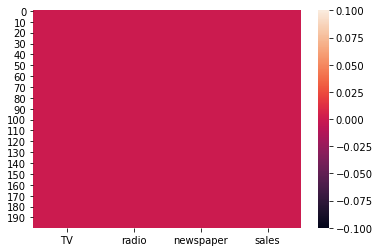

In [10]:
sns.heatmap(df.isnull())

With the help of heatmap checking null value.

<AxesSubplot:>

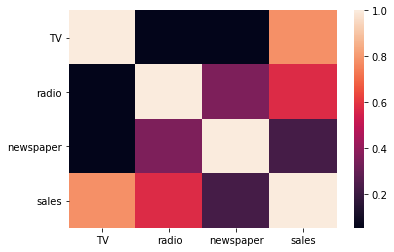

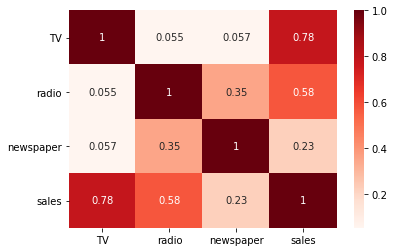

In [11]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Reds',annot=True)

Good correlation is present and all columns are highly correlated with each other. 

# Univariate Analysis

# Ploting Outliers by Box Plot

<AxesSubplot:>

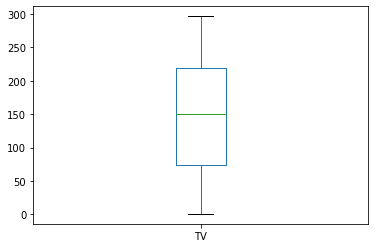

In [12]:
df['TV'].plot.box()

No Outliers are present in TV column.

<AxesSubplot:>

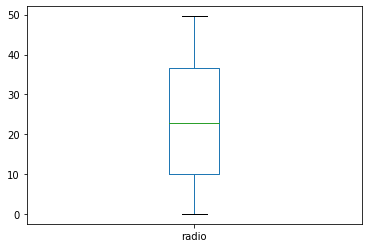

In [13]:
df['radio'].plot.box()

No Outliers are present in radio column.

<AxesSubplot:>

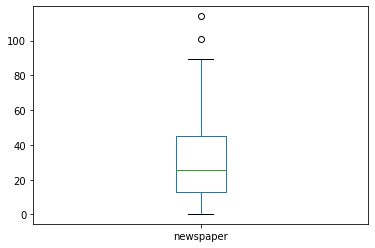

In [14]:
df['newspaper'].plot.box()

Outliers are present in newspaper column.

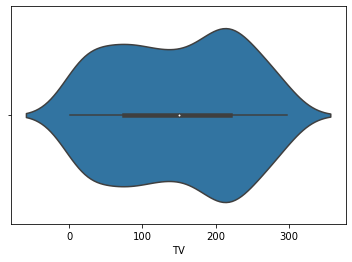

In [15]:
sns.violinplot(x='TV',data=df)
plt.show()

Maximum is distributed between 0 to 300.

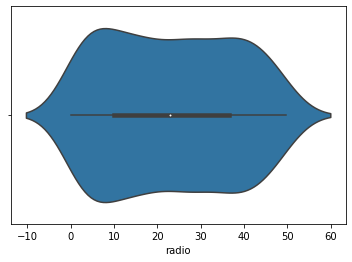

In [16]:
sns.violinplot(x='radio',data=df)
plt.show()

all value are approx. same scale but few are different.

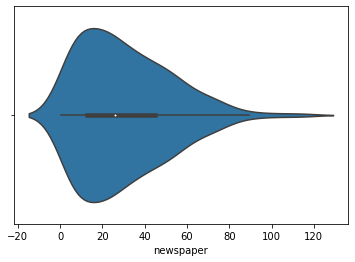

In [17]:
sns.violinplot(x='newspaper',data=df)
plt.show()

Maximum data are present between 0 to 80

# Bivariate Anaysis

<AxesSubplot:xlabel='TV', ylabel='radio'>

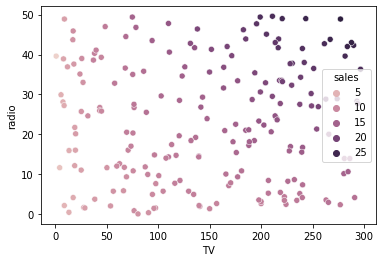

In [18]:
sns.scatterplot(data=df, x="TV", y="radio", hue="sales")

checking relationship between "TV" and "radio" columns and data is highly spreaded.

<AxesSubplot:xlabel='TV', ylabel='sales'>

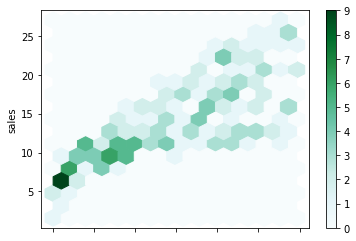

In [19]:
df.plot.hexbin(x='TV', y='sales', gridsize=15)

checking relationship between "TV" and "sales" columns.

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

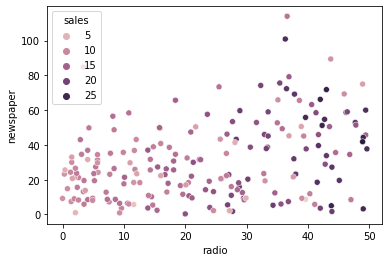

In [20]:
sns.scatterplot(data=df, x="radio", y="newspaper", hue="sales")

Checking relationship between "radio" and "newspaper" columns and the data is spreading.

<AxesSubplot:xlabel='radio', ylabel='sales'>

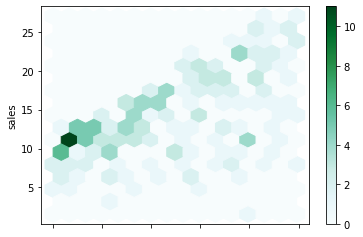

In [21]:
df.plot.hexbin(x='radio', y='sales', gridsize=15)

Checking relationship between "radio" and "sales" columns.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

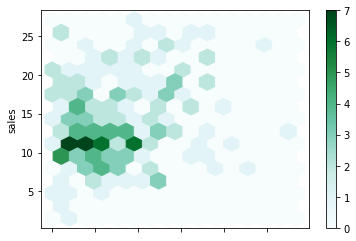

In [22]:
df.plot.hexbin(x='newspaper', y='sales', gridsize=15)

Checking relationship between "newspaper" and "sales"

# Multivariate Anaysis

In [23]:
collist=df.columns.values
ncol=5
nrows=10

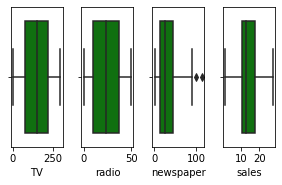

In [24]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find all variable outliers in a one place.

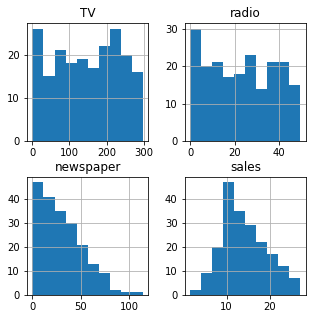

In [25]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Ploting all columns in one place with the help of histplot.

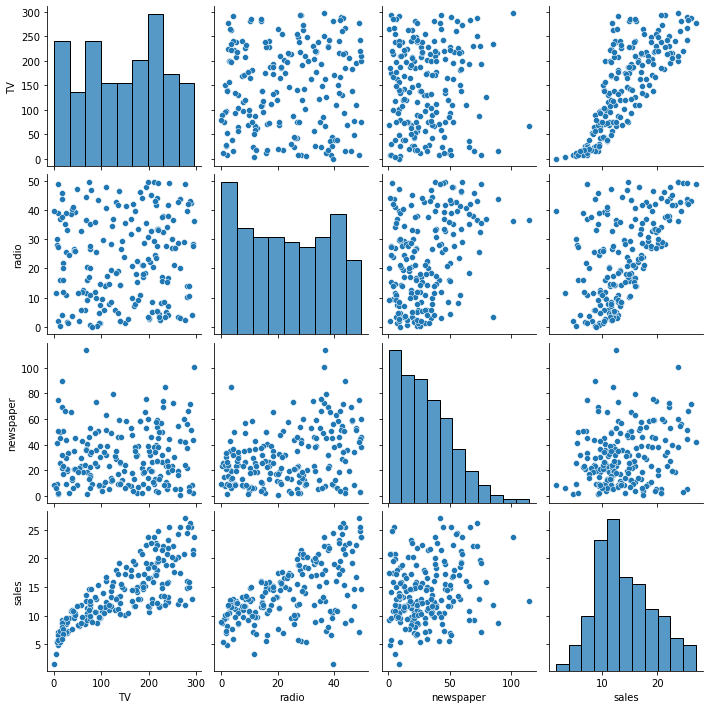

In [26]:
sns.pairplot(df)

# Zscore Value

In [27]:
from scipy.stats import zscore

In [28]:
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

Applying Zscore functionality on entire data to remove outliers.

In [29]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


Setting threshold point.

In [30]:
z[16][2]

3.8411707150992718

In [31]:
z[101][2]

3.238153957342154

checking the value wether it is below threshold point or not.

In [32]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


With the help of above functionality we are trying to get all the values that is below from threshold point.

# Skewness

In [33]:
collist=df_new.columns.values
ncol=5
nrows=10

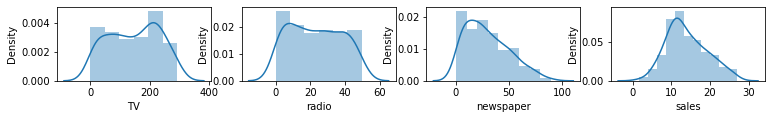

In [34]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

In [35]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

All Variable already skewed.

# Spliting All data into X and Y(Target Variable)

In [36]:
x=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [37]:
x.shape

(198, 3)

In [38]:
y.shape

(198,)

Checking shape after spliting x and y.

# Spliting X and y into Train data and Test data for model building.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

# Model Building

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.coef_

array([0.04460682, 0.18242062, 0.01286366])

In [43]:
lr.intercept_

2.757015802134795

In [44]:
lr.score(x_train,y_train)

0.8898152730900353

In [45]:
pred=lr.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [ 8.67797775 11.90420913 23.25102251  8.90519615 10.59167366 21.56367143
 19.13671596 11.46378131 13.93314849 17.45471969 14.14841912 20.85513868
  8.74122033 12.54847678  6.50129521  9.02344393 10.85201206 12.41646089
  9.72238377 11.3829014  13.16962408 16.85850009 22.90577939  6.09946233
 16.93217155 20.78593021  8.20247969 14.92838254  6.82797748 12.22477754
 17.71812741 13.51378872  6.45282814 14.38378573 15.37346135 17.90540789
 15.11864961 11.72864491 18.23911495 16.00438707 19.03494949 13.03023761
 11.7470536   9.29824781  6.26086364  7.51664599 16.98523902 16.0021104
 11.06933674 22.71691646 16.75096873 13.85809989 18.50474125  5.31347095
  4.54185396 12.28569049  9.63319576 21.54056584 13.7446564  10.73598152
 20.52627148  7.34012709 20.21626429  7.75233902 24.05462193 13.46631581]
Actual Price,y_test


In [46]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 1.3528603338111884
Mean squared error: 3.0788950440726897
Root Mean Squared error: 1.754678045703168
0.8963227937512861


# Ramdom Forest Regressor

In [47]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [48]:
rf.score(x_train,y_train)

0.9964812827779989

In [49]:
pred=rf.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [ 8.905 13.02  23.44  10.703  5.715 23.603 19.417 12.847 15.285 14.649
 14.398 22.701  5.571 13.46   9.141 10.256  5.668 11.594 10.042 12.109
 12.909 17.677 24.239  7.193 17.171 21.991  8.015 12.183  7.649 12.704
 18.515 14.768  9.333 12.964 12.446 19.21  15.167 12.777 19.017 16.652
 21.29   6.073 13.043 11.081  7.964  7.831 17.623 16.251  9.088 25.231
 18.449 12.878 19.919  8.536  7.597 11.845 11.258 20.627 13.204 12.45
 22.055  9.443 21.313  9.394 25.51  12.046]
Actual Price,y_test


In [50]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 0.5182575757575784
Mean squared error: 0.40431613636364055
Root Mean Squared error: 0.6358585820476441
0.9863852561196734


# Decision Tree Regressor

In [51]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred=dtc.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.8 12.9 25.5  8.7  5.3 25.4 19.6 12.4 15.5 14.8 12.9 25.4  5.3 13.2
  9.5 10.6  5.3 11.4  9.6 11.8 14.7 17.1 22.1  8.  17.4 21.8  8.  12.5
  8.  12.8 19.  15.   9.5 11.6 12.7 18.  15.6 12.8 19.  16.6 22.6  5.3
 13.2 11.3  8.5  8.  19.  17.4  8.5 27.  18.4 13.4 20.2  5.9  7.3 11.4
 11.6 20.8 14.6 14.1 21.7  9.6 21.7  8.7 25.5 11.7]
Actual Price,y_test
error:
Mean absolute error: 0.9378787878787878
Mean squared error: 1.3104545454545455
Root Mean Squared error: 1.1447508661077945
0.955872394399993


# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
Enr=ElasticNet(alpha=0.0001)
Enr.fit(x_train,y_train)
Enrpred=Enr.predict(x_test)
print(Enr.score(x_train,y_train))
Enr.coef_

0.8898152730895864


array([0.04460681, 0.18242045, 0.01286359])

In [55]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9754662435943674


In [56]:
dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())

[0.96349331 0.96427725 0.94223628 0.92025642 0.9682541 ]
0.9517034689858909 0.01816352531757558


# Hyper parameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse'],'max_depth':[None],'max_features': ['auto'],'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],'min_impurity_split': [None],'min_samples_leaf': [1],'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],'n_estimators':[10],'n_jobs': [1],'oob_score': [False],'random_state': [42],'verbose': [0],'warm_start': [False]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(x_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(x_test) - y_test) ** 2))

r2 / variance :  0.9399226851455029
Residual sum of squares: 0.46


# Saving Model

In [60]:

import joblib
joblib.dump(rf,'SalesPred.obj')

['SalesPred.obj']